<a href="https://colab.research.google.com/github/Bobby9800/STATSANDSCANS/blob/main/NETLIXMONTHLYARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


net_df = pd.read_csv("Netflix_stock_history.csv", index_col="Date", parse_dates=True)
net_df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-06,1.08,1.232143,0.842143,0.999286,0.999286,74190200
2002-01-07,1.00,1.299286,0.850000,0.953571,0.953571,73610600
2002-01-08,0.95,0.999286,0.706429,0.936429,0.936429,64883000


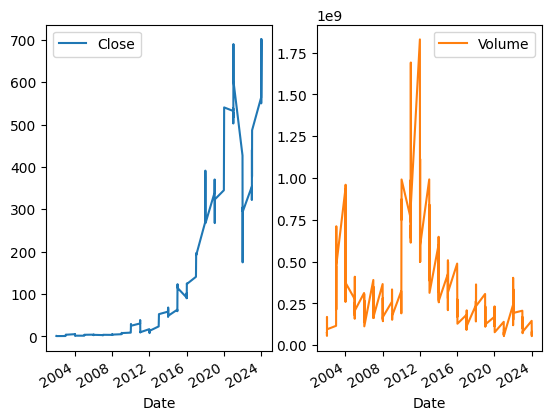

In [3]:
net_df[["Close","Volume"]].plot(subplots=True, layout=(1,2));

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = net_df[0:int(len(net_df)*0.9)], net_df[int(len(net_df)*0.9):]


train_arima = train_data['Open']
test_arima = test_data['Open']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

<ipython-input-4-e7a41c1d0761>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [5]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

<ipython-input-5-975b35aeea6e>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [6]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 2049.558990497505
MAE: 36.13209120506374
RMSE: 45.27205529349761


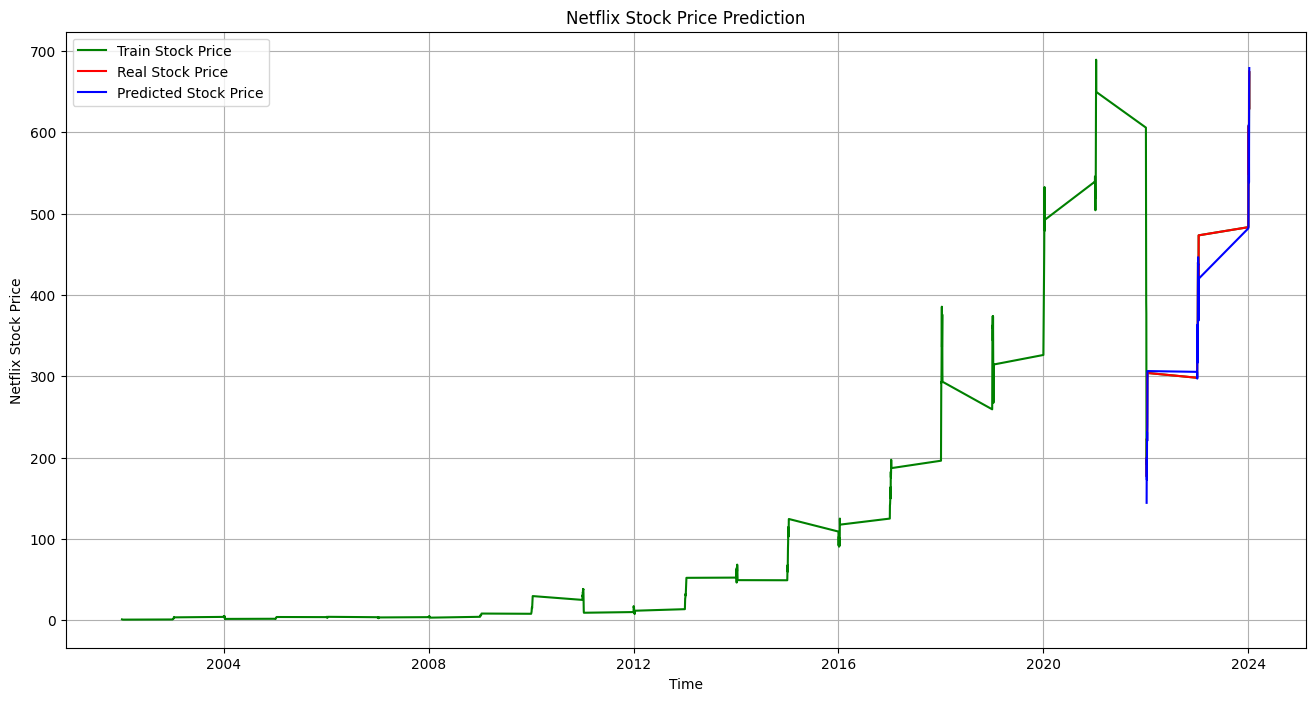

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(net_df.index[-600:], net_df['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()